In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(
    '/Users',
    'chair',
    'Documents',
    'Academia',
    'SuperRes',
    'Biteen_colab',
    'Mispolarization',
    'python',
    ))
sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Get physical constants from Scipy
import scipy.constants as con
## Some useful numerical constants
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m
kb = con.physical_constants['Boltzmann constant in eV/K'][0]

import scipy.integrate as int

import scipy.io as sio

import scipy.optimize as opt

from misloc_mispol_package.parameterize import displaced_osc_model as dom


In [2]:
## This needs to be in a seperate cell from the imports
## Matplotlib settings
## inspired by http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 150,  # to adjust notebook inline plot size
    'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
#     'figure.figsize': [3.5, 2.625], # 4 x 3
#     'figure.figsize': [4, 3], # 4 x 3
    'figure.figsize': [4*1.125, 3*1.125], # 4x3, full slide in keynote
    'font.family': 'serif',
    'figure.max_open_warning':100
}
mpl.rcParams.update(params)


In [3]:
path_to_mol_data = (
    "/Users/chair/Documents/Academia/SuperRes/Biteen_colab/"+
    "Mispolarization/python/gitted/spectral_fitting/")

def norm_spec(spec):
    return spec/spec.max()

def nm_to_ev_correct(spec):
    return spec/(1240/thermo_fisher_dye_data.T[0])**5.

In [19]:
emily_model = dom.mol_fluo_model(
    num_vib_modes=1,
    hbar_omega_eg_0=0.,
    script_d=[1.6],
    hbar_omega_0=[1],
    hbar_gamma=[.18],
#     T=.3/kb,
    T=0.00001,
    )


integrand_hbarws = np.linspace(-5, 10, 3)
ts, integrand = emily_model.emission_lineshape(
    integrand_hbarws/hbar,
#     mode_idx,
    t_bound = 20,
    t_points = 1000,
    return_integrand=1
    )

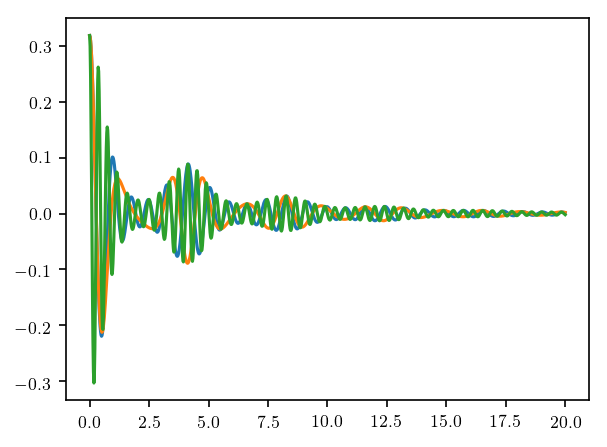

In [20]:
for integ in integrand:
    plt.plot(ts, integ)

Plot g to see its real and imaginary parts

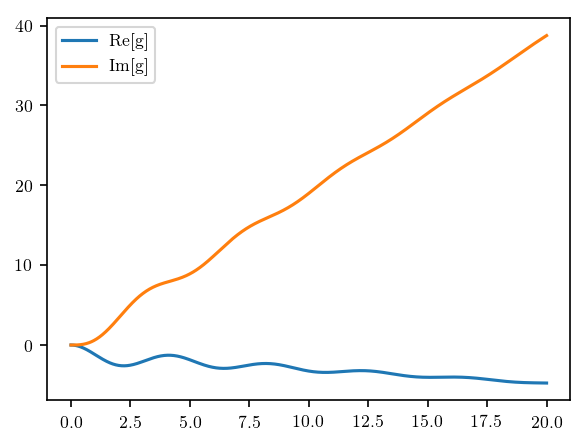

In [21]:
k2 = -emily_model.g(ts)
plt.plot(ts, np.real(k2), label='Re[g]')
plt.plot(ts, np.imag(k2), label='Im[g]')
plt.legend()

Text(0, 0.5, 'Emission Lineshape [a.u.]')

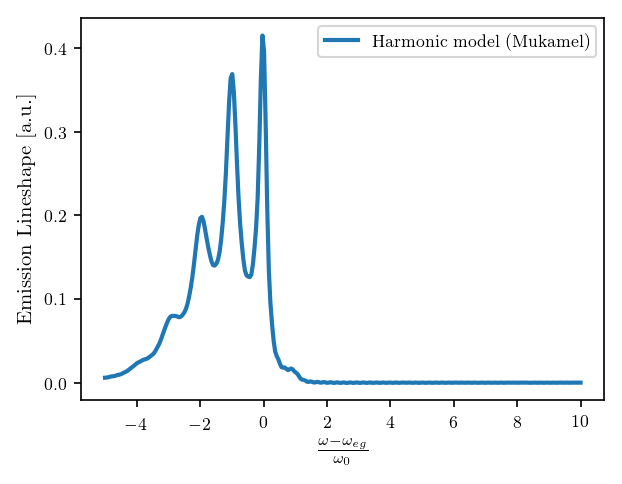

In [10]:
hbar_ws = np.linspace(-5, 10, 300)
model = emily_model.emission_lineshape(
    hbar_ws/hbar,
#     mode_idx,
    t_bound = 20,
    t_points = 1000,
    )

plt.plot(hbar_ws, model, lw=2, label='Harmonic model (Mukamel)')

plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel(r'$\frac{\omega - \omega_{eg}}{\omega_0}$', fontsize=10)
plt.ylabel(r'Emission Lineshape [a.u.]', fontsize=10)